Nugroho Budianggoro, NadiData.com, 01/02/2022.

This script is to analyze human stampedes data by means of k-means clustering and two methods of topic modeling.

### K-means Clustering

In [1]:
# Imports

import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction import text
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import names
import gensim
from nltk.tokenize.casual import casual_tokenize
from gensim.corpora import Dictionary
from gensim.models.nmf import Nmf as GensimNmf
from gensim.models import CoherenceModel
from operator import itemgetter
import matplotlib.pyplot as plt

nltk.download('names')

[nltk_data] Downloading package names to C:\Users\Nugroho
[nltk_data]     Budianggoro\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [2]:
# Get the dataset

url = "https://github.com/nugi1209/NadiData.com/raw/main/1225_dataset.csv"
df = pd.read_csv(url)
print(df.shape)
df.head()

(183, 7)


,Event ID,Event Name,Date,Number of Deaths,Country,Place,Description
0,1,1807 Newgate disaster,1807-02-23,30,United Kingdom,"Newgate Prison,\nLondon",Dozens of spectators were crushed to death whe...
1,2,-,1809-03-29,5000,Portugal,Ponte das Barcas [pt]\nOporto,Thousands of Portuguese civilians died trying ...
2,3,Carnival tragedy of 1823,1823-02-12,110,Malta,Valletta,About 110 boys died in a crush while attemptin...
3,4,Theatre Royal disaster,1849-02-19,65,United Kingdom,"Glasgow, Scotland","A human crush occurred at the Theatre Royal, D..."
4,5,-,1865-01-16,20,United Kingdom,"Dundee, Scotland",A crush occurred during admissions into Bell S...


In [3]:
# Clean and lemmatize data.
# The cleaning involves transforming string to lowercase,
# put together words if all characters in word are text,
# discard names

lemmatizer = WordNetLemmatizer()
clean_data = []
all_names = set(names.words())
for doc in df['Description']:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha()
                           and word not in all_names)
    clean_data.append(doc_cleaned)

In [4]:
# Add stop words that can decrease insight

add_stop_words = ['killed', 'injured', 'stampede', 'least', 'crowd', 'died', 'one', 'trying', 'people',
                  'many', 'death', 'three', 'women', 'two', 'occured', 'others', 'caused', 'wa', 'republic',
                  'leading', 'number', 'causing', 'day', 'near', 'deaths', 'get', 'tried', 'new', 'later',
                  'end', 'following', 'injuries', 'person', 'tear', 'occurred', 'human', 'killing',
                  'heading', 'incident', 'body', 'history', 'year', 'according', 'official', 'injury',
                  'large', 'safety', 'capacity', 'toll', 'said', 'event', 'result', 'west', 'dead', 'resulting',
                  'confirmed', 'tragedy', 'aged', 'small', 'false', 'lost', 'shortly', 'dozen',
                  'são', 'final', 'marking', 'rhode', 'location', 'million', 'main', 'reduced',
                  'approximately', 'report', 'state', 'home', 'time', 'reported', 'mass',
                  'thousand', 'led', 'group', 'félix', 'ivory', 'including', 'gallery', 'seven', 'far',
                  'arrested','attempting', 'season', 'tp', 'mazembe', 'claimed', 'injuring', 'use', 'instantly',
                  'tuesday', 'northern', 'ikea', 'cause', 'present', 'member', 'suffered', 'began', 'gathered', 'start',
                  'uhuru', 'expected', 'exacerbated', 'stade', 'seat', 'try', 'good', 'area',
                  'set', 'champion', 'big', 'impossible', 'disaster', 'place', 'resulted', 'available', 'local', 'water'
                 ]
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


In [5]:
# Tokenize data so that it can be fitted to the scoring calculations

tokenized_data = []

for text in clean_data:
    res = casual_tokenize(text)
    tokenized_data.append(res)
    
# tokenized_data[0]

In [6]:
# # Perform the scoring calculation using Gensim NMF to determine the optimum number of topics

# dictionary = Dictionary(tokenized_data)

# dictionary.filter_extremes(no_below=3, no_above=0.85, keep_n=5000)

# corpus = [dictionary.doc2bow(text) for text in tokenized_data]

# topic_nums = list(np.arange(5, 30 + 1))

# coherence_scores = []

# for num in topic_nums:
#     nmf = GensimNmf(
#             corpus=corpus,
#             num_topics=num,
#             id2word=dictionary,
#             chunksize=200,
#             passes=5,
#             kappa=.1,
#             minimum_probability=0.01,
#             w_max_iter=300,
#             h_stop_condition=0.001,
#             eval_every=10,
#             normalize=True,
#             random_state=42
#             )
#     cm = CoherenceModel(
#             model=nmf,
#             texts=tokenized_data,
#             dictionary=dictionary,
#             coherence='c_v'
#             )
#     coherence_scores.append(round(cm.get_coherence(), 5))

# scores = list(zip(topic_nums, coherence_scores))
# best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]
# print(scores)
# print(best_num_topics)
# plt.plot(topic_nums, coherence_scores)
# plt.show

In [7]:
# Do tfidf vectorizing and then normalize data
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
data = tfidf_vectorizer.fit_transform(clean_data)
data = normalize(data)

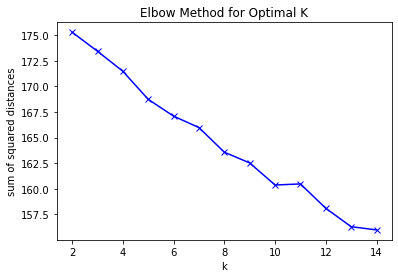

In [8]:
# Create elbow method visualization to get optimum number of cluster

sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(data)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum of squared distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [9]:
# Use the optimum number of cluster to build the clustering

k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)

KMeans(random_state=42)

In [10]:
# Count the occurence of data points for each cluster

clusters = kmeans.labels_
print(Counter(clusters))

Counter({0: 68, 7: 27, 2: 23, 6: 21, 1: 16, 4: 14, 3: 10, 5: 4})


In [11]:
# Try to get to 10 most common words for each cluster along with the cluster number
# and the occurence of data points of each cluster

# Get unique cluster labels
labels = np.unique(clusters)

# Transform vectorized data to array
data_array = data.toarray()

# Create counter for data points of each cluster
counter = Counter(clusters)

data_array.shape

(183, 1060)

In [12]:
# Process one cluster at a time
for label in labels:
#     Print cluster label
    print('Cluster: {}'.format(label + 1))
    print('Data count: {}'.format(counter[label]))
#     Get the index of the data points from the cluster currently being processed
    id_temp = np.where(clusters==label)
#     Get the average tfidf score of every word feature from all data points
    x_means = np.mean(data_array[id_temp], axis = 0) # returns average score across cluster
#     Get sorted index of features based on average score    
    sorted_means = np.argsort(x_means)[::-1][:10]
#     Get feature column names to be incorporated to the results
    features = tfidf_vectorizer.get_feature_names()
#     Get two dimension list of features and their score based on the sorted features
    best_features = [(features[i], x_means[i]) for i in sorted_means]
#     Add column names to the sorted features two-dimentional list
    df_cluster = pd.DataFrame(best_features, columns = ['features', 'score'])
    print(df_cluster)

Cluster: 1
Data count: 68
      features     score
0      concert  0.040731
1  overcrowded  0.029728
2     festival  0.028044
3     football  0.025939
4       church  0.023216
5       police  0.021645
6         game  0.021570
7         city  0.020622
8     teenager  0.019393
9        match  0.017797
Cluster: 2
Data count: 16
    features     score
0    station  0.181430
1      panic  0.135559
2      train  0.085721
3      woman  0.079978
4  confusion  0.051791
5      bihar  0.048820
6  nightclub  0.045514
7    falling  0.036689
8      child  0.036647
9      broke  0.036102
Cluster: 3
Data count: 23
    features     score
0    stadium  0.278532
1        cup  0.064410
2        fan  0.060232
3      match  0.059309
4      enter  0.047265
5      crush  0.046381
6   football  0.043013
7    crushed  0.041761
8      world  0.039511
9  spectator  0.036047
Cluster: 4
Data count: 10
    features     score
0    pilgrim  0.265361
1    stoning  0.255426
2      devil  0.173814
3    jamarat  0.160605


### Topic Modeling Using Non-negative Matrix Factorization (NMF)

In [13]:
# Instantiate the NMF object and define the number of topics

t = 8
nmf_model = NMF(n_components=t, init='nndsvda', random_state=42)

In [14]:
# Do count vectorizing

count_vectorizer = CountVectorizer(stop_words=stop_words, max_features=None, max_df=0.5, min_df=2)

data_count = count_vectorizer.fit_transform(clean_data)


In [15]:
# Fit the NMF algorithm

nmf_model.fit(data_count)

NMF(init='nndsvda', n_components=8, random_state=42)

In [16]:
# Get the features of the NMF model that is fitted to the data

nmf_transform  = nmf_model.transform(data_count)
nmf_transform.shape

(183, 8)

In [17]:
# Get the highest value of all topic values and assign it as the topic for each data points

df_topic = pd.DataFrame(nmf_transform).idxmax(axis=1)
df_topic.head()

0    7
1    0
2    0
3    0
4    0
dtype: int64

In [18]:
# Check out the components of the model

nmf_model.components_.shape

(8, 253)

In [19]:
# Create dataframe of features components

nmf_components_df = pd.DataFrame(nmf_model.components_, columns=count_vectorizer.get_feature_names())
nmf_components_df.shape

(8, 253)

In [20]:
# Get frequency of each topic in the data

# Get the maximum topic value of each data points and then count each
nmf_topic_freq = pd.DataFrame(nmf_transform).idxmax(axis=1).value_counts()
nmf_topic_freq

5    37
7    33
0    31
1    29
4    19
3    12
2    12
6    10
dtype: int64

In [21]:
# Get top terms for each topic

# Iterate for each topic
for topic in range(nmf_components_df.shape[0]):
#     Locate the topic
    tmp = nmf_components_df.iloc[topic]
    print(f'Topic {topic}')
#     Print topic frequency
    print(f'Frequency: {nmf_topic_freq[topic]}')
#     Get the largest 5 words
    print(tmp.nlargest(10))
    print('\n')

Topic 0
Frequency: 31
crush        3.565318
exit         0.789266
school       0.339496
escape       0.313686
girl         0.261615
left         0.256548
boy          0.224913
packed       0.224580
stairway     0.221950
nightclub    0.206592
Name: 0, dtype: float64


Topic 1
Frequency: 29
stadium         2.145148
match           0.524782
enter           0.472571
cup             0.449516
world           0.281573
football        0.249569
fired           0.227742
capital         0.198116
national        0.181521
independence    0.156292
Name: 1, dtype: float64


Topic 2
Frequency: 12
fan          2.109977
gate         1.094704
collapse     0.390234
leaving      0.343413
stair        0.322402
fell         0.290079
burning      0.274188
escape       0.262190
staircase    0.259536
police       0.225446
Name: 2, dtype: float64


Topic 3
Frequency: 12
child        2.833246
fell         0.945979
school       0.736063
stairwell    0.717276
primary      0.623258
pupil        0.598746
rushed      

### Topic Modeling Using Latent Dirichlet Allocation (LDA)

In [22]:
# Assign number of topics

t = 8

# Instatiate the algorithm and fit the algorithm to count vectorized data

lda_model = LatentDirichletAllocation(n_components=t, learning_method='batch', random_state=42)

lda_model.fit(data_count)

LatentDirichletAllocation(n_components=8, random_state=42)

In [23]:
# Get the features of the NMF model that is fitted to the data

lda_transform  = lda_model.transform(data_count)
lda_transform.shape

(183, 8)

In [24]:
# Check out the components of the model

lda_model.components_.shape

(8, 253)

In [25]:
# Create dataframe of features components

lda_components_df = pd.DataFrame(lda_model.components_, columns=count_vectorizer.get_feature_names())
lda_components_df.shape

(8, 253)

In [26]:
# Get frequency of each topic in the data

# Get the maximum topic value of each data points and then count each
lda_topic_freq = pd.DataFrame(lda_transform).idxmax(axis=1).value_counts()
lda_topic_freq

7    29
3    26
2    26
0    26
5    23
4    19
1    18
6    16
dtype: int64

In [27]:
# Get top terms for each topic

# Iterate each topic
for topic in range(lda_components_df.shape[0]):
#     Locate the topic
    tmp = lda_components_df.iloc[topic]
    print(f'Topic {topic}')
#     Print topic frequency
    print(f'Frequency: {lda_topic_freq[topic]}')
#     Get the largest 5 words
    print(tmp.nlargest(10))
    print('\n')

Topic 0
Frequency: 26
pilgrim      9.046313
crush        8.991729
saudi        5.124994
station      4.125712
stoning      4.125037
devil        4.125000
woman        3.877663
religious    3.125470
exit         3.125145
escape       3.125021
Name: 0, dtype: float64


Topic 1
Frequency: 18
festival     5.991197
temple       5.928411
hindu        4.125441
bridge       4.125226
stampeded    3.125032
ghat         2.125229
jamarat      2.125204
mecca        2.125055
rushing      2.124965
stoning      2.124963
Name: 1, dtype: float64


Topic 2
Frequency: 26
crush        10.733920
police        9.834701
panic         7.124982
gas           5.714163
fired         5.125243
nightclub     4.125064
canister      4.124966
party         3.124881
exit          3.124840
station       3.124678
Name: 2, dtype: float64


Topic 3
Frequency: 26
crush       6.301477
gate        6.125391
game        6.125298
child       5.125499
student     5.125410
bridge      5.124739
stairway    4.125414
fan         4.125

In [28]:
# Assign the topic from NMF topic modeling to a new column in master data frame

df['NMF Topic'] = df_topic

df.to_excel('1225_dataset2.xlsx')
df.head()

,Event ID,Event Name,Date,Number of Deaths,Country,Place,Description,NMF Topic
0,1,1807 Newgate disaster,1807-02-23,30,United Kingdom,"Newgate Prison,\nLondon",Dozens of spectators were crushed to death whe...,7
1,2,-,1809-03-29,5000,Portugal,Ponte das Barcas [pt]\nOporto,Thousands of Portuguese civilians died trying ...,0
2,3,Carnival tragedy of 1823,1823-02-12,110,Malta,Valletta,About 110 boys died in a crush while attemptin...,0
3,4,Theatre Royal disaster,1849-02-19,65,United Kingdom,"Glasgow, Scotland","A human crush occurred at the Theatre Royal, D...",0
4,5,-,1865-01-16,20,United Kingdom,"Dundee, Scotland",A crush occurred during admissions into Bell S...,0
